In [1]:
import networkx as nx
import random as rd
import scipy as sp
import numpy as np
import scipy.io
opts = {"with_labels": True, "node_color":'grey'}


#Funcion para seleccionar los nodos que se reconectan, a partir de nkp
#ESTA FUNCION NO SE USA
'''
def set_nodes_to_reconnect(n,k,p):
    nodes = []
    
    for i in range(0,round(n*k*p)):
        while len(nodes) < round(n*k*p):
            node = rd.randint(0,n-1)
            if not node in nodes: 
                nodes.append(node)
    print("Los nodos que se van a recablear son:", nodes)
    return nodes
     

'''
#Funcion para conectar los nodos
def connect_nodes(G,n,k,p):
    nodes_senders = []
    nodes_receivers = []
    #while len(nodes_receivers)< (round(n*k*p)-1):
    for node in G:
        if len(nodes_receivers) ==  (round(n*k*p)):
            break 
        node_vecino = get_neighbors(G,node)
        receiver_node = rd.randint(0,n-1)
        #for connection in range(1,k+1):
        if  receiver_node != node and not G.has_edge(node,receiver_node):# and not receiver_node in nodes_receivers:
            G.remove_edge(node, ((node_vecino[rd.randint(0,len(node_vecino)-1)])%n))
            G.add_edge(node,receiver_node)
            nodes_senders.append(node)
            nodes_receivers.append(receiver_node) 
                                       
    print("Los nodos que envian la conexion son", nodes_senders)
    print("Los nodos que reciben la conexion son", nodes_receivers)               
    return G,nodes_senders,nodes_receivers
    

#Funcion para obtener los vecinos de los nodos
def get_neighbors(G, node):
    neighbors = []
    #for node in nodes:
    for node_G in G:
            if G.has_edge(node,node_G):
                neighbors.append(node_G)
    return neighbors


#Inicia una red conectando cada nodo a sus 2k vecinos
def create_regular_network(n, k,p):
    if k > 0.16*n:
        raise Exception("k debe ser <= que el 16% de n")
    G = nx.cycle_graph(n)
    for v in G:
        for o in range(2, k+1): #decide hasta que nodo se va a conectar
            G.add_edge(v, (v+o) % n)#crea la conexion
    print("El numero de conexiones a recablear son:",round(n*k*p))
    return G


def new_conn_S(G,nodes_senders,nodes_receivers):
    for i in range(0,len(nodes_senders)):
        neighbors = get_neighbors(G, nodes_receivers[i])
        G.add_edge(nodes_senders[i], neighbors[rd.randint(0,len(neighbors)-1)])
    return G


def new_conn_R(G,nodes_senders,nodes_receivers):
    for i in range(0,len(nodes_receivers)):
        neighbors = get_neighbors(G, nodes_senders[i])
        G.add_edge(nodes_receivers[i], neighbors[rd.randint(0,len(neighbors)-1)])
    return G


#Matriz de acoplamiento

def matriz_acoplaminento(G):
    ma = np.zeros([len(G),len(G)])
    for nodo in G:
        for i in range(0,len(G)):
            if nodo != i:
                if G.has_edge(nodo,i):
                    ma[nodo,i] = 1
                else:
                    ma[nodo,i] = 0
            else:
                ma[nodo,i] = -(nx.degree(G,nodo))
                #ma[nodo,i] = -1
    return ma 






El numero de conexiones a recablear son: 180
Los nodos que envian la conexion son [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 15, 16, 17, 18, 19, 21, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48]
Los nodos que reciben la conexion son [11, 46, 31, 8, 43, 24, 26, 39, 44, 38, 3, 43, 1, 41, 22, 47, 12, 31, 3, 43, 31, 20, 4, 21, 9, 18, 49, 24, 17, 13, 0, 22, 44, 13, 32, 21, 32, 8, 37, 11, 14]
[[-13.   1.   1. ...   1.   0.   1.]
 [  1. -12.   1. ...   1.   1.   1.]
 [  1.   1. -10. ...   0.   0.   1.]
 ...
 [  1.   1.   0. ... -11.   1.   1.]
 [  0.   1.   0. ...   1.  -8.   1.]
 [  1.   1.   1. ...   1.   1. -11.]]
El coeficiente de agrupamiento es: 0.340998334998335
El promedio del camino mas corto es: 1.9510204081632654
Los valores propios son:
El valos propio Lamda2 es:
-3.391147345292577
El valor propio LamdaN es:
-17.916389510667493
El valor del eingratio de la red es:
5.283282525466827


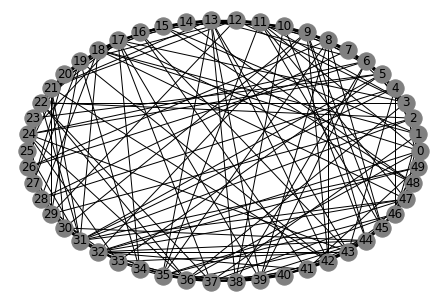

In [4]:
n,k,p  = 50,4,0.9
G = create_regular_network(n,k,p)
G,nodes_senders,nodes_receivers = connect_nodes(G, n,k,p)
#if len(nodes_receivers) != round(n*k*p):
    #raise Exception("No se generaron las nkp conexiones requeridas, considere simular nuevamente")
G = new_conn_S(G,nodes_senders,nodes_receivers)
G = new_conn_R(G,nodes_senders,nodes_receivers)
ma = matriz_acoplaminento(G)
#ma = -nx.laplacian_matrix(G).toarray()
scipy.io.savemat('c:/Users/Administrador/Documents/1MyStuffs/Master_FIME/TESIS/codigos/osciladores-Matlab/MatAcop.mat', mdict={'arr': ma})
print(ma)

print("El coeficiente de agrupamiento es:",nx.algorithms.average_clustering(G))
print("El promedio del camino mas corto es:",nx.average_shortest_path_length(G))
nx.draw_circular(G,**opts)

#Calculo de los valores propios de la matriz de acoplamiento
vp = np.linalg.eigvals(ma)
vp = sorted(vp,reverse=True)
print("Los valores propios son:")
#print(vp)
print("El valos propio Lamda2 es:")
print(vp[1])

print("El valor propio LamdaN es:")
print(vp[n-1])

#Calculo del metodo eingratio para sincronizabilidad
eingratio = vp[n-1]/vp[1]
print("El valor del eingratio de la red es:")
print(eingratio)